<a href="https://colab.research.google.com/github/ihyaulumuddin044/machineLearning/blob/main/klasifikasi_dengan_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#klasifikasi dengan KNN (K Nearest Nightboard)

##semple dataset

In [5]:
import pandas as pd

sensus = {
    "tinggi":[158, 170, 183, 191, 155, 163, 180,158,178],
    "berat":[64,86,84,80,49,59,67,54,67],
    "jk":['pria','pria','pria','pria','wanita','wanita','wanita','wanita','wanita'],
 }

sensus_df = pd.DataFrame(sensus)
sensus_df

,tinggi,berat,jk
0,158,64,pria
1,170,86,pria
2,183,84,pria
3,191,80,pria
4,155,49,wanita
5,163,59,wanita
6,180,67,wanita
7,158,54,wanita
8,178,67,wanita


#visualisasi data

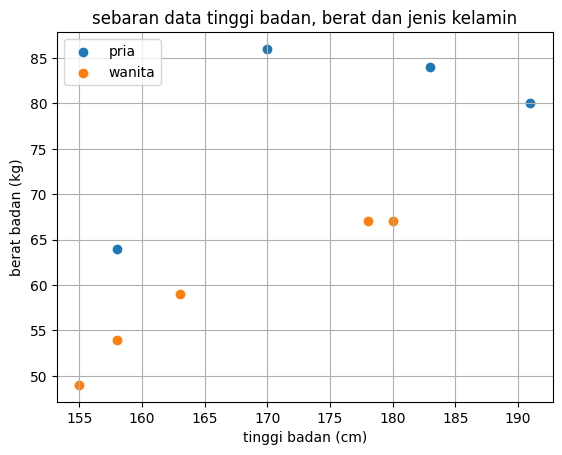

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
for jk, d in sensus_df.groupby('jk'):
  ax.scatter(d['tinggi'],d['berat'],label=jk)

plt.legend(loc = 'upper left')
plt.title('sebaran data tinggi badan, berat dan jenis kelamin')
plt.xlabel('tinggi badan (cm)')
plt.ylabel('berat badan (kg)')
plt.grid(True)
plt.show()